In [28]:
using JLD2
using DynamicPolynomials
using TSSOS

function coef_range(obj)
    maximum(abs.(coefficients(obj)))/minimum(abs.(coefficients(obj)))
end

using Plots


function heatmap_obj(objective)

    function f(γ_val, ω_val)
        return objective(variables(objective) => (γ_val, ω_val))
    end
    
    w = range(-30, 10, length=1000)
    g = range(-2*γᶠ, 2*γᶠ, length=1000)

    z = @. f(g', w)

    heatmap(g, w, log.(z))

end


function contour_obj(objective)

    function f(γ_val, ω_val)
        return objective(variables(objective) => (γ_val, ω_val))
    end
    
    w = range(-30, 10, length=1000)
    g = range(-2*γᶠ, 2*γᶠ, length=1000)

    z = @. f(g', w)

    contour(g, w, log.(z))
end

contour_obj (generic function with 1 method)

Consider polynomial objective

In [36]:
p = load_object("objective.jld2")

9.904175521655992e62γ¹⁶ + 2.4344716550100415e65γ¹⁴ + 1.5846680834649588e64γ¹²ω² + 4.655360774633789e65γ¹²ω + 2.3509838281349196e67γ¹² + 2.9213659860120492e66γ¹⁰ω² + 9.508008500789747e64γ⁸ω⁴ + 8.630170993379823e67γ¹⁰ω + 5.58643292956055e66γ⁸ω³ + 8.842082362178287e68γ¹⁰ + 2.715886596473223e68γ⁸ω² + 1.1685463944048183e67γ⁶ω⁴ + 2.5354689335439293e65γ⁴ω⁶ + 5.469954759833557e69γ⁸ω + 6.90413679470386e68γ⁶ω³ + 2.23457317182422e67γ⁴ω⁵ + 2.977613927201025e70γ⁸ + 1.3971337824958324e70γ⁶ω² + 1.0442370396738179e69γ⁴ω⁴ + 1.5580618592064215e67γ²ω⁶ + 2.535468933543924e65ω⁸ + 1.2636407969782138e71γ⁶ω + 2.8815136612772895e70γ⁴ω³ + 1.3808273589407713e69γ²ω⁵ + 2.979430895765625e67ω⁷ + 1.6520910628709802e71γ⁶ + 3.4482667953422774e71γ⁴ω² + 4.173801952034808e70γ²ω⁴ + 1.336159254344464e69ω⁶ + 5.145903029798791e71γ⁴ω + 4.618599980832878e71γ²ω³ + 2.774127029375471e70ω⁵ + 4.823179300036851e71γ⁴ + 9.608373506491208e71γ²ω² + 2.4923092748285877e71ω⁴ + 9.863530882913545e71γ²ω + 6.428402453692123e71ω³ + 6.15100975673

Suspected minumum

In [42]:
variables(p)

2-element Vector{PolyVar{true}}:
 γ
 ω

In [41]:
γᶠ = 2.5133
ωᶠ = -25.133

p(variables(p) => (γᶠ, ωᶠ))

7.700876824248223e70

In [80]:
p(variables(p) => (0, 0))

3.9775354991397576e71

Check the range of coefficients 

In [67]:
coef_range(p / minimum(abs.(coefficients(obj))))

9.958962117893028e8

Ploting the function we can see it has three local minima 

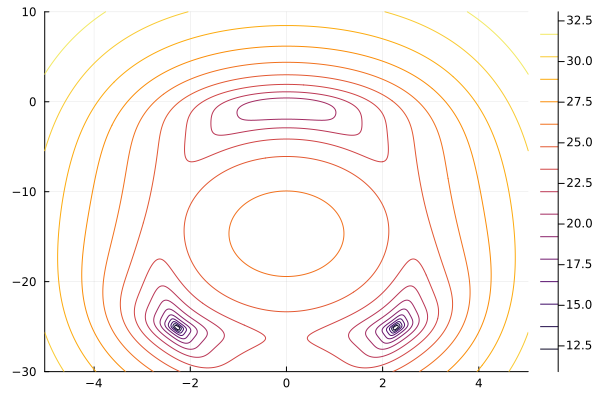

In [68]:
contour_obj(p / minimum(abs.(coefficients(obj))))

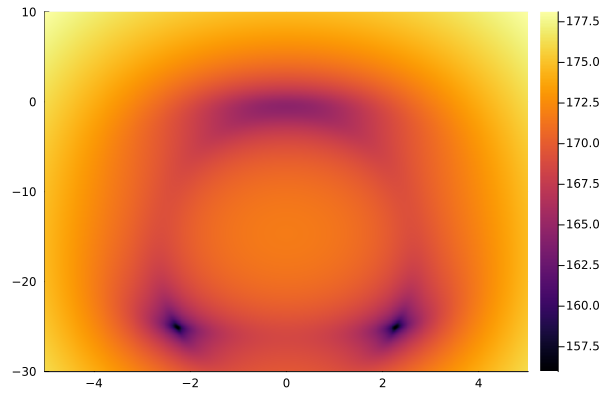

In [31]:
heatmap_obj(obj)

TSSOS fails

In [72]:
using TSSOS

opt,sol,data = tssos_first(p, variables(p), solution=true, newton=true)

*********************************** TSSOS ***********************************
Version 1.0.0, developed by Jie Wang, 2020--2023
TSSOS is launching...
Starting to compute the block structure...
-----------------------------------------------------------------------------
The sizes of PSD blocks:
[15, 10]
[1, 1]
-----------------------------------------------------------------------------
Obtained the block structure. The maximal size of blocks is 15.
Assembling the SDP...
There are 47 affine constraints.
Solving the SDP...
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (0) is fixed to numerically large value    4e+71.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (1) is fixed to numerically large value    6e+71.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (2) is fixed to numerically large value    9e+71.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (3) is fixed to numerically large v

(1.0, [-0.44554368334599914, -2.669008312401039], TSSOS.upop_data(2, 0, PolyVar{true}[γ, ω], 9.904175521655992e62γ¹⁶ + 2.4344716550100415e65γ¹⁴ + 1.5846680834649588e64γ¹²ω² + 4.655360774633789e65γ¹²ω + 2.3509838281349196e67γ¹² + 2.9213659860120492e66γ¹⁰ω² + 9.508008500789747e64γ⁸ω⁴ + 8.630170993379823e67γ¹⁰ω + 5.58643292956055e66γ⁸ω³ + 8.842082362178287e68γ¹⁰ + 2.715886596473223e68γ⁸ω² + 1.1685463944048183e67γ⁶ω⁴ + 2.5354689335439293e65γ⁴ω⁶ + 5.469954759833557e69γ⁸ω + 6.90413679470386e68γ⁶ω³ + 2.23457317182422e67γ⁴ω⁵ + 2.977613927201025e70γ⁸ + 1.3971337824958324e70γ⁶ω² + 1.0442370396738179e69γ⁴ω⁴ + 1.5580618592064215e67γ²ω⁶ + 2.535468933543924e65ω⁸ + 1.2636407969782138e71γ⁶ω + 2.8815136612772895e70γ⁴ω³ + 1.3808273589407713e69γ²ω⁵ + 2.979430895765625e67ω⁷ + 1.6520910628709802e71γ⁶ + 3.4482667953422774e71γ⁴ω² + 4.173801952034808e70γ²ω⁴ + 1.336159254344464e69ω⁶ + 5.145903029798791e71γ⁴ω + 4.618599980832878e71γ²ω³ + 2.774127029375471e70ω⁵ + 4.823179300036851e71γ⁴ + 9.608373506491208e71γ²ω²

In [73]:
function scaling_poly(p::Polynomial)
    X = transpose(hcat([exponents(t) for t in terms(p)]...))

    # Get the scaling via linear regression
    scaling = X \ log.(abs.(coefficients(p)))

    exp.(abs.(scaling)) # 
end

scaling_poly (generic function with 1 method)

In [74]:
scale = scaling_poly(p)

2-element Vector{Float64}:
 415307.4856274184
      3.352175650446393e11

In [75]:
# scale the polynomial
p_scaled = DynamicPolynomials.subs(p, variables(p) => scale .* variables(p))

7.757726651148231e152γ¹⁶ + 1.1055575348632598e144γ¹⁴ + 4.688446381319597e154γ¹²ω² + 4.108820969688655e144γ¹²ω + 6.1899444296166626e134γ¹² + 5.011146425450944e145γ¹⁰ω² + 1.0625630319445113e156γ⁸ω⁴ + 4.416149408428343e135γ¹⁰ω + 1.8623999987137573e146γ⁸ω³ + 1.3497463020878178e125γ¹⁰ + 2.700991629449147e136γ⁸ω² + 7.571319660119318e146γ⁶ω⁴ + 1.0702812877332778e157γ⁴ω⁶ + 1.6228133578435672e126γ⁸ω + 1.3344682433640526e137γ⁶ω³ + 2.813892177177556e147γ⁴ω⁵ + 2.635278139344248e115γ⁸ + 8.055826096771974e126γ⁶ω² + 3.922700930344731e137γ⁴ω⁴ + 3.813158143118965e147γ²ω⁶ + 4.04270852799096e157ω⁸ + 2.173546621895007e116γ⁶ω + 3.229089038984621e127γ⁴ω³ + 1.0081211751737965e138γ²ω⁵ + 1.4171658774071983e148ω⁷ + 8.477202080957399e104γ⁶ + 1.1527454868546918e117γ⁴ω² + 9.090304359254513e127γ²ω⁴ + 1.89591484333311e138ω⁶ + 5.131772572903326e105γ⁴ω + 3.0007524466082845e117γ²ω³ + 1.1742489472237342e128ω⁵ + 1.4348696285559726e94γ⁴ + 1.8622712103749657e106γ²ω² + 3.1470888346246513e117ω⁴ + 5.702938574579383e94γ²ω + 2.

In [76]:
maximum(abs.(coefficients(p_scaled)))

4.04270852799096e157

In [77]:
minimum(abs.(coefficients(p_scaled)))

3.9775354991397576e71

In [78]:
coef_range(p_scaled)

1.0163852789912995e86

In [79]:
opt,sol,data = tssos_first(p_scaled, variables(p_scaled), solution=true, newton=true)

*********************************** TSSOS ***********************************
Version 1.0.0, developed by Jie Wang, 2020--2023
TSSOS is launching...
Starting to compute the block structure...
-----------------------------------------------------------------------------
The sizes of PSD blocks:
[15, 10]
[1, 1]
-----------------------------------------------------------------------------
Obtained the block structure. The maximal size of blocks is 15.
Assembling the SDP...
There are 47 affine constraints.
Solving the SDP...
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (0) is fixed to numerically large value    4e+71.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (1) is fixed to numerically large value    2e+83.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (2) is fixed to numerically large value    1e+95.
MOSEK warning 54 (MSK_RES_WRN_LARGE_CON_FX): The equality constraint '' (3) is fixed to numerically large v

(1.0, [2.2507163943886703, 2.0560978456253003], TSSOS.upop_data(2, 0, PolyVar{true}[γ, ω], 7.757726651148231e152γ¹⁶ + 1.1055575348632598e144γ¹⁴ + 4.688446381319597e154γ¹²ω² + 4.108820969688655e144γ¹²ω + 6.1899444296166626e134γ¹² + 5.011146425450944e145γ¹⁰ω² + 1.0625630319445113e156γ⁸ω⁴ + 4.416149408428343e135γ¹⁰ω + 1.8623999987137573e146γ⁸ω³ + 1.3497463020878178e125γ¹⁰ + 2.700991629449147e136γ⁸ω² + 7.571319660119318e146γ⁶ω⁴ + 1.0702812877332778e157γ⁴ω⁶ + 1.6228133578435672e126γ⁸ω + 1.3344682433640526e137γ⁶ω³ + 2.813892177177556e147γ⁴ω⁵ + 2.635278139344248e115γ⁸ + 8.055826096771974e126γ⁶ω² + 3.922700930344731e137γ⁴ω⁴ + 3.813158143118965e147γ²ω⁶ + 4.04270852799096e157ω⁸ + 2.173546621895007e116γ⁶ω + 3.229089038984621e127γ⁴ω³ + 1.0081211751737965e138γ²ω⁵ + 1.4171658774071983e148ω⁷ + 8.477202080957399e104γ⁶ + 1.1527454868546918e117γ⁴ω² + 9.090304359254513e127γ²ω⁴ + 1.89591484333311e138ω⁶ + 5.131772572903326e105γ⁴ω + 3.0007524466082845e117γ²ω³ + 1.1742489472237342e128ω⁵ + 1.4348696285559726e